# MAT 186: Fitting Logistic Growth to Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
import urllib.request


# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
# Update 07/18/22: got retina working with updates thanks to 
# https://stackoverflow.com/questions/54312924/what-is-matplotlibs-retina-display-mode
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# add the folder "datasets" to our path... more on this below
PATH = os.path.join("datasets") 

# specify the URL where the data can be downloaded
URL = "https://github.com/ageorgemorgan/mathcircles/blob/main/gause_data.csv"

# create a function that creates a folder called 'datasets' in your current directory, downloads
# the data from my git repo, and finally loads the data as a Pandas dataframe. 
def fetch_and_load_gause_data(my_url=URL, my_path=PATH):
    # first, if the 'datasets' folder doesn't exist, make it
    if not os.path.isdir(my_path):
        os.makedirs(my_path)
    # then add the filename of the data file to your path
    csv_path = os.path.join(my_path, "gause_data.csv")
    # download the data from the url specified above and save it to the datasets folder
    # with the specified name
    urllib.request.urlretrieve(my_url, csv_path)
    # finally, use Pandas to read the data... 
    data = pd.read_csv("gause_data.csv")
    # and output the resulting Pandas dataframe
    return data 

#now just call the handy function above and presto, you have 
# an up-to-date version of the data ready to play with! 
data = fetch_and_load_gause_data()

In [3]:
dens =  data['Density'].to_numpy()
dens = dens[2:]

dens_ch = data['Change in Density'].to_numpy()
dens_ch = dens_ch[2:-1]

import operator
x = dens[:-1]
y = dens_ch

L = sorted(zip(x,y), key=operator.itemgetter(0))

x, y = zip(*L)

x = np.array(x)
y = np.array(y)

In [4]:
## Fit to Logistic Curve 

x0 = x[0]

def sigmoidal(t, r, K):
    return x0*K*np.exp(r*(t-2.))/(K+x0*(np.exp(r*(t-2.))-1.))

T = 25

t = np.arange(2,T)

from scipy.optimize import curve_fit

params_opt = curve_fit(sigmoidal, t,x, bounds= [[0., 0.], [np.inf, 600.]])
 
r_best = params_opt[0][0]

K_best = params_opt[0][1]

print('Optimal value of r = %.5f' % r_best)
print('Optimal value of K = %.1f' % K_best)

Optimal value of r = 0.69048
Optimal value of K = 552.2


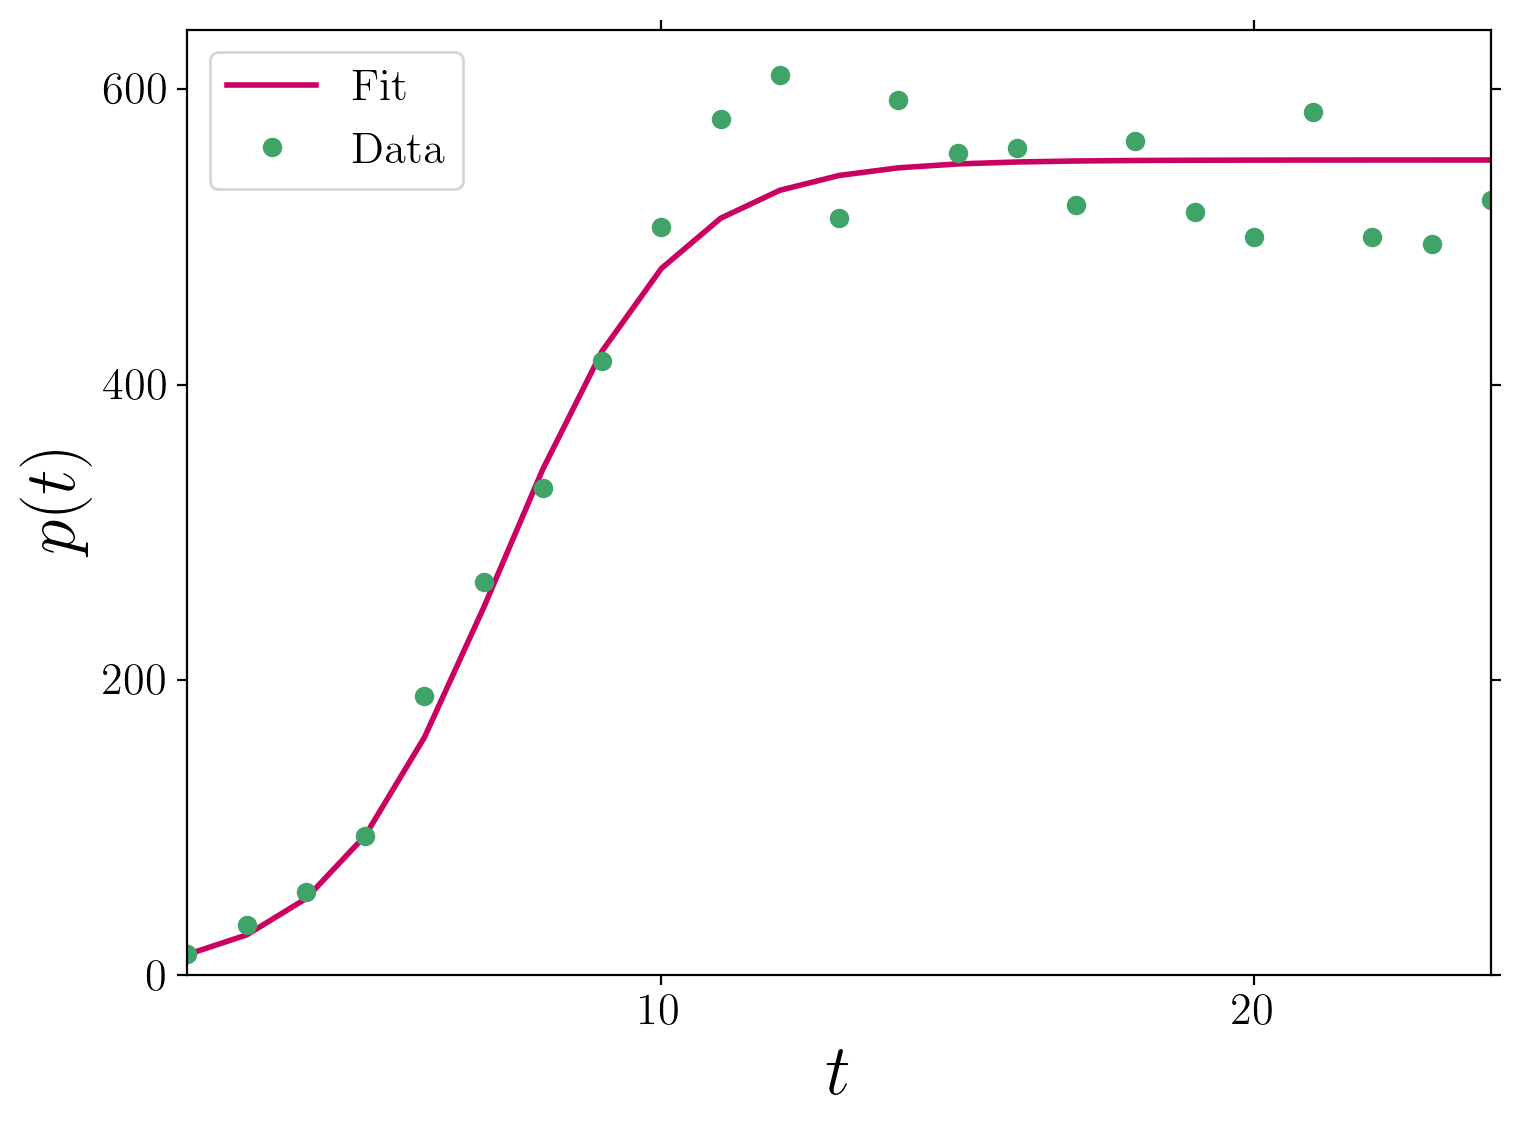

In [8]:
fig, ax =plt.subplots()   

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fit = sigmoidal(t, r_best, K_best)

plt.plot(np.arange(2,T), fit, linestyle='solid', color='xkcd:deep pink', label='Fit', linewidth=2)
plt.plot(np.arange(2,T+1), dens, 'o', color='xkcd:greenish', label='Data', linewidth=2)

plt.xlabel(r"$t$", fontsize=26, color = 'k')
plt.ylabel(r"$p(t)$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

ax.legend(fontsize=16)

plt.xlim([2, 24])
plt.ylim([0, 1.05*np.amax(dens)])

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'logistic_curve_fit.png'
#plt.savefig(figname, dpi=600)

plt.show()

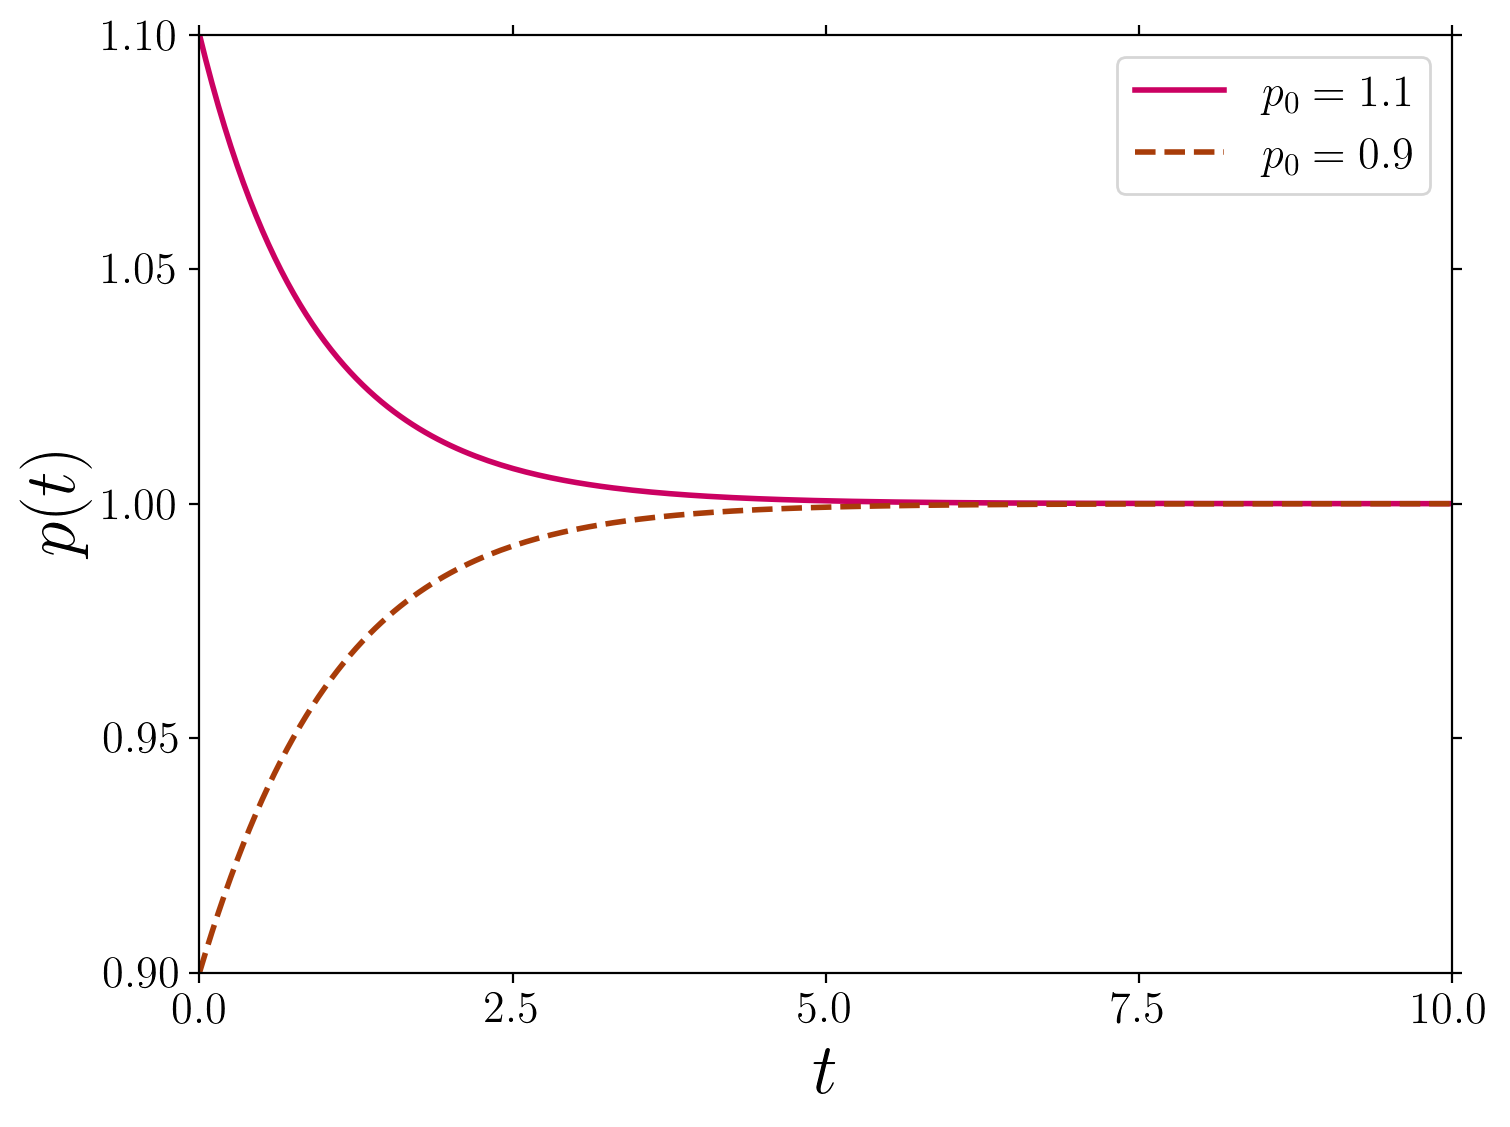

In [6]:
fig, ax =plt.subplots() 

def sigmoidal_soln(t, x0, r, K):
    return x0*K*np.exp(r*t)/(K+x0*(np.exp(r*t)-1.))

tt = np.linspace(0,T,500)
p_up = sigmoidal_soln(tt, 1.1, 1, 1) 
p_down = sigmoidal_soln(tt, 0.9, 1, 1) 

plt.plot(tt, p_up, linestyle='solid', color='xkcd:deep pink', label='$p_0=1.1$', linewidth=2)
plt.plot(tt, p_down, linestyle='dashed', color='xkcd:rust', label='$p_0=0.9$', linewidth=2)

plt.xlabel(r"$t$", fontsize=26, color = 'k')
plt.ylabel(r"$p(t)$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

ax.legend(fontsize=16)

plt.xlim([0, 10])
plt.ylim([0.8999, 1.10001])

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'logistic_attraction.png'
#plt.savefig(figname, dpi=800)

plt.show()

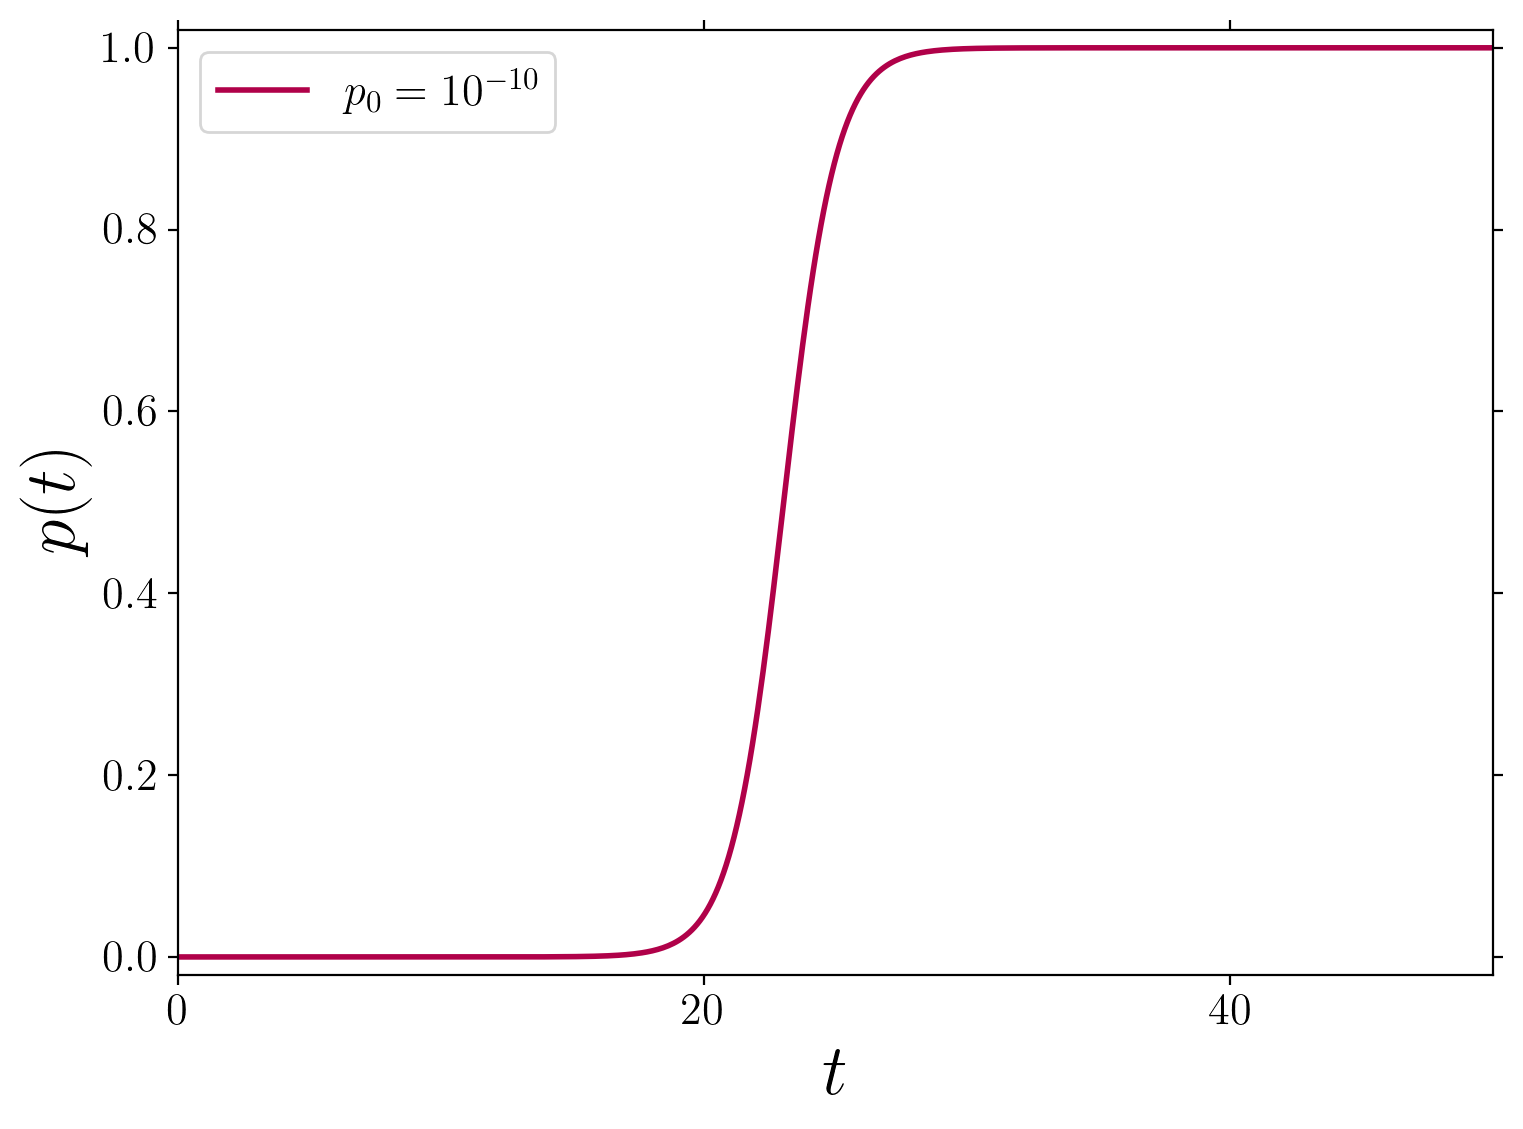

In [7]:
fig, ax =plt.subplots() 

tt = np.linspace(0,50,500)
p_small = sigmoidal_soln(tt, 1e-10, 1, 1) 

plt.plot(tt, p_small, linestyle='solid', color='xkcd:raspberry', label='$p_0=10^{-10}$', linewidth=2)

plt.xlabel(r"$t$", fontsize=26, color = 'k')
plt.ylabel(r"$p(t)$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

ax.legend(fontsize=16, loc='upper left')

plt.xlim([0, 50])
plt.ylim([-0.02, 1.02])

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'logistic_repulsion.png'
#plt.savefig(figname, dpi=800)

plt.show()